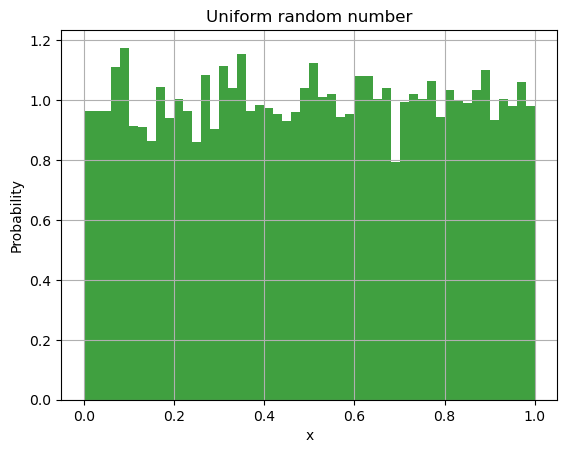

In [23]:
#! /usr/bin/env python

# imports of external packages to use in our code
import sys
import numpy as np
import matplotlib.pyplot as plt
from numpy import * #need to have this line of code to use the savetxt function to save the random numbers to a text file

#################
# Random class
#################
# class that can generate random numbers
class Random:
    """A random number generator class"""

    # initialization method for Random class
    def __init__(self, seed = 5555):
        self.seed = seed
        self.m_v = np.uint64(4101842887655102017)
        self.m_w = np.uint64(1)
        self.m_u = np.uint64(1)
        
        self.m_u = np.uint64(self.seed) ^ self.m_v
        self.int64()
        self.m_v = self.m_u
        self.int64()
        self.m_w = self.m_v
        self.int64()

    # function returns a random 64 bit integer
    def int64(self):
        self.m_u = np.uint64(self.m_u * 2862933555777941757) + np.uint64(7046029254386353087)
        self.m_v ^= self.m_v >> np.uint64(17)
        self.m_v ^= self.m_v << np.uint64(31)
        self.m_v ^= self.m_v >> np.uint64(8)
        self.m_w = np.uint64(np.uint64(4294957665)*(self.m_w & np.uint64(0xffffffff))) + np.uint64((self.m_w >> np.uint64(32)))
        x = np.uint64(self.m_u ^ (self.m_u << np.uint64(21)))
        x ^= x >> np.uint64(35)
        x ^= x << np.uint64(4)
        with np.errstate(over='ignore'):
            return (x + self.m_v)^self.m_w

    # function returns a random floating point number between (0, 1) (uniform)
    def rand(self):
        return 5.42101086242752217E-20 * self.int64()

# main function for this Python code
if __name__ == "__main__":
    # if the user includes the flag -h or --help print the options
    if '-h' in sys.argv or '--help' in sys.argv:
        print ("Usage: %s [-seed number]" % sys.argv[0])
        print
        sys.exit(1)

    # default seed
    seed = 5555

    # read the user-provided seed from the command line (if there)
    if '-seed' in sys.argv:
        p = sys.argv.index('-seed')
        seed = sys.argv[p+1]

    # set random seed for numpy
    np.random.seed(seed)

    # class instance of our Random class using seed
    random = Random(seed)

    # create some random data
    N = 10000

    # an array of random numbers from numpy
    x = np.random.rand(N)

    # an array of random numbers using our Random class
    myx = []
    for i in range(0,N):
        myx.append(random.rand())

    # create histogram of our data
    n, bins, patches = plt.hist(myx, 50, density=True, facecolor='g', alpha=0.75)

    # plot formating options
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.title('Uniform random number')
    plt.grid(True)

    # show figure (program only ends once closed
    plt.show()
    
savetxt('randomnumbers.txt', c_[myx], fmt='%.3f') #saves the data sets, up to 3 decimals, as columns in a txt file


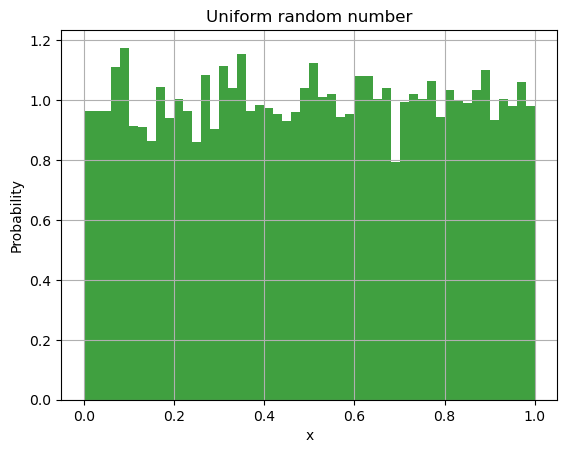

In [24]:
#read text file created in the previous cell
randomdata = 'randomnumbers.txt'

#copy and paste from above 

# create histogram of our data
n, bins, patches = plt.hist(myx, 50, density=True, facecolor='g', alpha=0.75)

# plot formating options
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Uniform random number')
plt.grid(True)

# show figure (program only ends once closed
plt.show()